In [1]:
import pm4py
import pandas as pd
from pm4py.objects.conversion.log import converter as log_conv

In [2]:
df = pd.read_csv('./repair2.csv')

In [51]:
print(pd.DataFrame(df['RepairCode']).value_counts())
print(pd.DataFrame(df['RepairType']).value_counts())
print(pd.DataFrame(df['contact']).value_counts())

RepairCode
1.0           550
2.0           224
3.0            94
4.0            59
dtype: int64
RepairType
P             439
E             370
B             118
dtype: int64
contact 
Phone       270
Web         265
Personal    240
Letter      225
dtype: int64


# 결측치 정보

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.3+ MB


In [5]:
tp = [str(i).split(':') for i in df['time']]
minutes = []
for time in tp:
    temp = 0
    if len(time) != 2:
        minutes.append(0)
        continue
        
    temp += int(time[0]) * 60 + int(time[1])
    minutes.append(temp)

In [6]:
df['minutes'] = minutes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   caseID               13262 non-null  int64  
 1   taskID               13260 non-null  object 
 2   originator           13260 non-null  object 
 3   eventtype            13257 non-null  object 
 4   contact              1000 non-null   object 
 5   RepairType           927 non-null    object 
 6   objectKey            927 non-null    float64
 7   RepairInternally     927 non-null    object 
 8   EstimatedRepairTime  927 non-null    float64
 9   RepairCode           927 non-null    float64
 10  RepairOK             1854 non-null   object 
 11  date                 13249 non-null  object 
 12  time                 13249 non-null  object 
 13  minutes              13262 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 1.4+ MB


In [7]:
df1 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).mean()
df2 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).count()
df3 = df.loc[:,['taskID','originator','minutes']].groupby(['taskID','originator']).max()
ans = pd.concat([df1,df2,df3],axis=1)
ans.columns = ['minutes','count','max']
ans

minutes  count   max
taskID                 originator                         
ArrangeSurvey          Dian        710.110604    877  1439
                       Monica      707.697032    977  1437
ExternRepair           DoIt        754.893939     66  1414
                       FixIt       697.727273     66  1423
FirstContact           Dian        710.131183    465  1436
                       Monica      701.365169    534  1438
ImmediateRepair        Anne        715.572973    370  1439
                       Barbara     727.448864    176  1430
                       Ben         432.500000      8   722
                       Eric        844.000000      8  1390
                       Jacky       708.956522    184  1430
                       Lex         630.857143     14  1361
                       Nick        755.000000      6  1059
InformClientSurvey     System      700.843413    926  1437
InformClientWrongPlace Dian        686.310345     29  1436
                       Monica      674.954545     44  1438
InternRepair           Anne        758.733333     60  1437
                       Barbara     709.333333     30  1422
                       Ben         628.809524     42  1417
                       Cindy       734.620000    200  1416
                       Edd         742.323810    210  1425
                       Eric        694.772727     44  1339
                       Jacky       844.764706     34  1430
                       John        738.298969    194  1424
                       Lex         703.000000     44  1381
                       Nick        667.500000     36  1381
                       Paul        730.376884    199  1410
MakeTicket             Dian        714.758581    874  1439
                       Monica      709.177551    980  1435
ReadyInformClient      System      729.329018    927  1437
RepairReady            System      733.042071    927  1439
SendTicketToFinAdmin   System      714.158576    927  1433
Survey                 Anne        732.917241    435  1439
                       Barbara     693.864865    222  1430
                       Ben         738.400000     70  1435
                       Cindy       743.664894    188  1430
                       Edd         691.432099    162  1425
                       Eric        704.565217     46  1423
                       Jacky       693.336364    220  1429
                       John        704.272277    202  1437
                       Lex         587.888889     54  1307
                       Nick        578.287879     66  1321
                       Paul        687.351064    188  1410
TicketReady            System      714.386192    927  1434

In [8]:
df1 = df.loc[:,['taskID','originator','minutes']].groupby(['originator','taskID']).mean()
df1

minutes
originator taskID                            
Anne       ImmediateRepair         715.572973
           InternRepair            758.733333
           Survey                  732.917241
Barbara    ImmediateRepair         727.448864
           InternRepair            709.333333
           Survey                  693.864865
Ben        ImmediateRepair         432.500000
           InternRepair            628.809524
           Survey                  738.400000
Cindy      InternRepair            734.620000
           Survey                  743.664894
Dian       ArrangeSurvey           710.110604
           FirstContact            710.131183
           InformClientWrongPlace  686.310345
           MakeTicket              714.758581
DoIt       ExternRepair            754.893939
Edd        InternRepair            742.323810
           Survey                  691.432099
Eric       ImmediateRepair         844.000000
           InternRepair            694.772727
           Survey                  704.565217
FixIt      ExternRepair            697.727273
Jacky      ImmediateRepair         708.956522
           InternRepair            844.764706
           Survey                  693.336364
John       InternRepair            738.298969
           Survey                  704.272277
Lex        ImmediateRepair         630.857143
           InternRepair            703.000000
           Survey                  587.888889
Monica     ArrangeSurvey           707.697032
           FirstContact            701.365169
           InformClientWrongPlace  674.954545
           MakeTicket              709.177551
Nick       ImmediateRepair         755.000000
           InternRepair            667.500000
           Survey                  578.287879
Paul       InternRepair            730.376884
           Survey                  687.351064
System     InformClientSurvey      700.843413
           ReadyInformClient       729.329018
           RepairReady             733.042071
           SendTicketToFinAdmin    714.158576
           TicketReady             714.386192

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13262 entries, 0 to 13261
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   caseID               13262 non-null  int64         
 1   taskID               13260 non-null  object        
 2   originator           13260 non-null  object        
 3   eventtype            13257 non-null  object        
 4   contact              1000 non-null   object        
 5   RepairType           927 non-null    object        
 6   objectKey            927 non-null    float64       
 7   RepairInternally     927 non-null    object        
 8   EstimatedRepairTime  927 non-null    float64       
 9   RepairCode           927 non-null    float64       
 10  RepairOK             1854 non-null   object        
 11  date                 13249 non-null  datetime64[ns]
 12  time                 13249 non-null  object        
 13  minutes              13262 non-

- 수리완료건은 모두 objectKey 가 있다.

In [11]:
df[df['date'] > '2010-01-01'].value_counts('taskID')

taskID
MakeTicket                132
ArrangeSurvey             119
Survey                    119
InternRepair               82
RepairReady                67
SendTicketToFinAdmin       59
TicketReady                57
InformClientSurvey         56
ReadyInformClient          55
FirstContact               51
ImmediateRepair            47
ExternRepair               10
InformClientWrongPlace      6
dtype: int64

In [12]:
df[df['date'] > '2000-01-01'].sort_values('caseID')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes
495,2,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2021-05-15,8:57,537
80,2,ImmediateRepair,Anne,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-26,6:57,417
320,4,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-21,8:27,507
524,8,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2021-06-13,4:14,254
152,9,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-06,19:08,1148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,991,MakeTicket,Monica,complete,NaN,P,9798.0,NaN,NaN,NaN,NaN,2021-08-21,22:31,1351
279,994,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-11,9:25,565
401,995,ArrangeSurvey,Monica,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-10,4:03,243
658,998,MakeTicket,Dian,complete,NaN,E,2142.0,NaN,NaN,NaN,NaN,2021-10-25,1:45,105


In [16]:
tp = df[df['RepairOK'] == True]
tp.sort_values('caseID')

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes
3676,1,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-17,15:44,944
7465,1,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-17,8:12,492
4582,2,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-12,11:17,677
495,2,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,2021-05-15,8:57,537
11359,3,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-06,23:30,1410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8830,998,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-19,10:34,634
6772,999,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-07,13:11,791
9399,999,RepairReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-07,12:23,743
2987,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20,2:25,145


<AxesSubplot:>

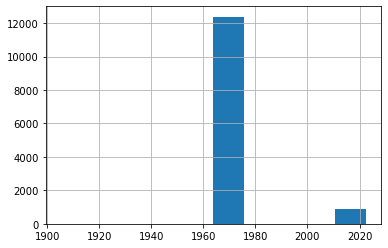

In [14]:
df['date'].hist()

# 사용데이터

제거대상
- RepairOK 컬럼에 True가 없는 caseID
- date < 1950-01-01, date > 2000-01-01
- contact 형식이 없는경우

In [23]:
using_case = list(tp[tp['taskID'] == 'RepairReady']['caseID'].sort_values())

In [52]:
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
0,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23 00:00:00+00:00,2022-09-14 00:00:00+00:00,0,1,FirstContact,1905-05-23 00:00:00+00:00,0
1,1,MakeTicket,Dian,complete,Phone,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,MakeTicket,1970-01-02 00:00:00+00:00,1
2,1,ArrangeSurvey,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,2
3,1,ArrangeSurvey,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,3
4,1,InformClientSurvey,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,InformClientSurvey,1970-01-02 00:00:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1000,InternRepair,John,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 18:34:00+00:00,1114,1000,InternRepair,1970-01-19 00:00:00+00:00,49
50,1000,InternRepair,John,start,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 14:34:00+00:00,874,1000,InternRepair,1970-01-19 00:00:00+00:00,50
51,1000,ReadyInformClient,System,complete,Web,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,ReadyInformClient,1970-01-20 00:00:00+00:00,51
52,1000,TicketReady,System,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,TicketReady,1970-01-20 00:00:00+00:00,52


In [53]:
# process 
process_info = pd.DataFrame()
process_info['count'] = tp.loc[:,['caseID','taskID']].groupby('caseID').count()['taskID']

In [54]:
print(process_info['count'].max())
print(process_info['count'].min())

18
12


In [56]:
print(pd.DataFrame(tp['RepairCode']).value_counts())
print(pd.DataFrame(tp['RepairType']).value_counts())

RepairCode
1.0           549
2.0           223
3.0            94
4.0            59
dtype: int64
RepairType
P             439
E             369
B             117
dtype: int64


In [62]:
tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
0,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23 00:00:00+00:00,2022-09-14 00:00:00+00:00,0,1,FirstContact,1905-05-23 00:00:00+00:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,MakeTicket,1970-01-02 00:00:00+00:00,1
2,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,2
3,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,InformClientSurvey,1970-01-02 00:00:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 18:34:00+00:00,1114,1000,InternRepair,1970-01-19 00:00:00+00:00,49
50,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 14:34:00+00:00,874,1000,InternRepair,1970-01-19 00:00:00+00:00,50
51,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,ReadyInformClient,1970-01-20 00:00:00+00:00,51
52,1000,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,TicketReady,1970-01-20 00:00:00+00:00,52


In [63]:
print(pd.DataFrame(tp['contact']).value_counts())

contact 
Phone       251
Web         239
Personal    228
Letter      207
dtype: int64


---
# Repair nonOK
---

In [64]:
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i not in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

In [65]:
# process 
process_info = pd.DataFrame()
process_info['count'] = tp.loc[:,['caseID','taskID']].groupby('caseID').count()['taskID']

In [66]:
print(process_info['count'].max())
print(process_info['count'].min())

2
2


In [67]:
tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
7449,6,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03 00:00:00+00:00,2022-09-14 02:29:00+00:00,149,6,InformClientWrongPlace,1970-01-03 00:00:00+00:00,7449
7450,6,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-03 00:00:00+00:00,2022-09-14 02:29:00+00:00,149,6,FirstContact,1970-01-03 00:00:00+00:00,7450
8906,7,FirstContact,Monica,complete,Letter,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 00:00:00+00:00,2022-09-14 09:21:00+00:00,561,7,FirstContact,1970-01-07 00:00:00+00:00,8906
8907,7,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 00:00:00+00:00,2022-09-14 09:21:00+00:00,561,7,InformClientWrongPlace,1970-01-07 00:00:00+00:00,8907
477,13,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 12:22:00+00:00,742,13,FirstContact,1970-01-02 00:00:00+00:00,477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12019,918,FirstContact,Monica,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 00:00:00+00:00,2022-09-14 20:52:00+00:00,1252,918,FirstContact,1970-01-07 00:00:00+00:00,12019
12382,942,FirstContact,Monica,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 00:00:00+00:00,2022-09-14 13:14:00+00:00,794,942,FirstContact,1970-01-07 00:00:00+00:00,12382
12383,942,InformClientWrongPlace,Monica,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-07 00:00:00+00:00,2022-09-14 13:14:00+00:00,794,942,InformClientWrongPlace,1970-01-07 00:00:00+00:00,12383
12741,966,InformClientWrongPlace,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-06 00:00:00+00:00,2022-09-14 02:35:00+00:00,155,966,InformClientWrongPlace,1970-01-06 00:00:00+00:00,12741


In [68]:
print(pd.DataFrame(tp['contact']).value_counts())

contact 
Web         24
Phone       19
Letter      18
Personal    12
dtype: int64


# 업무 분포도 

사용데이터
- date > 2010-01-01

In [69]:
tp2 = df.loc[:,['taskID','minutes','date']].groupby(['date','taskID']).count()
tp2 = tp2.reset_index()
tp2 = tp2[tp2['date'] >= '2010-01-01']
tp2.groupby(['date','taskID']).max()

,,minutes
date,taskID,
2020-01-06,InformClientSurvey,1
2020-01-07,ArrangeSurvey,1
2020-01-08,ReadyInformClient,1
2020-01-09,Survey,1
2020-01-10,Survey,1
...,...,...
2022-05-10,InformClientSurvey,1
2022-05-11,TicketReady,1
2022-05-12,FirstContact,1


Text(0.5, 1.0, 'Task Distribution')

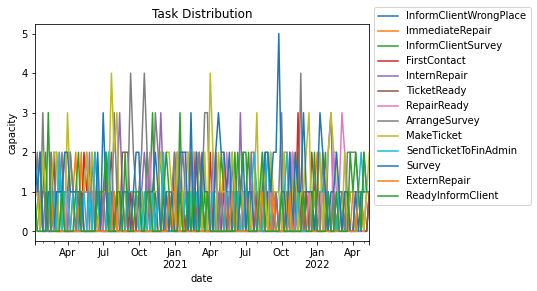

In [71]:
import matplotlib.pyplot as plt
name_list = list(set(tp2['taskID']))
for name in name_list:
    tp2[tp2['taskID'] == name].groupby([pd.Grouper(key='date', freq='1W')])['minutes'].count().plot()
plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.ylabel('capacity')
plt.title('Task Distribution')

# 업무 수용력

Text(0.5, 1.0, 'Capacity')

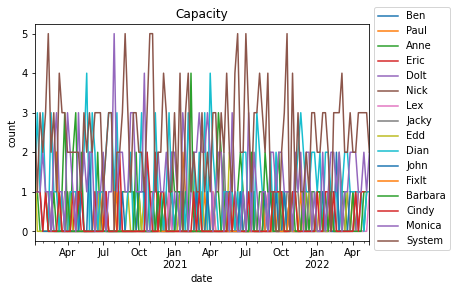

In [78]:
import matplotlib.pyplot as plt

tp = df.loc[:,['originator','minutes','date']].groupby(['date','originator']).mean().reset_index()
target = tp.groupby(['date','originator']).count().reset_index()
target = target[target['date'] >= '2010-01-01']

name_list = list(set(tp['originator']))
for name in name_list:
    target[target['originator'] == name].groupby([pd.Grouper(key='date', freq='1W')])['minutes'].count().plot()
    
plt.legend(name_list, bbox_to_anchor=(1, 1.1))
plt.ylabel('count')
plt.title('Capacity')

# RepairCode, type, contact별 소요시간 # PASS

- 같은 분석을 시도할 수 있고 contact만 소요시간분석

In [79]:
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
0,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23 00:00:00+00:00,2022-09-14 00:00:00+00:00,0,1,FirstContact,1905-05-23 00:00:00+00:00,0
1,1,MakeTicket,Dian,complete,Phone,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,MakeTicket,1970-01-02 00:00:00+00:00,1
2,1,ArrangeSurvey,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,2
3,1,ArrangeSurvey,Dian,start,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,3
4,1,InformClientSurvey,System,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,InformClientSurvey,1970-01-02 00:00:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1000,InternRepair,John,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 18:34:00+00:00,1114,1000,InternRepair,1970-01-19 00:00:00+00:00,49
50,1000,InternRepair,John,start,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 14:34:00+00:00,874,1000,InternRepair,1970-01-19 00:00:00+00:00,50
51,1000,ReadyInformClient,System,complete,Web,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,ReadyInformClient,1970-01-20 00:00:00+00:00,51
52,1000,TicketReady,System,complete,Web,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,TicketReady,1970-01-20 00:00:00+00:00,52


In [90]:
result = pd.DataFrame()
result['minutes'] = tp.loc[:,['caseID','minutes']].groupby(['caseID']).sum()['minutes']

In [91]:
result

,minutes
caseID,
1,9062
2,6655
3,6456
4,12641
5,12583
...,...
996,11673
997,12860
998,7120


In [94]:
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

# temp = [str(i).split(':') for i in dataframe['time']]
# minutes = []
# for time in temp:
#     i = 0
#     if len(time) != 2:
#         minutes.append(0)
#         continue    
#     i += int(time[0]) * 60 + int(time[1])
#     minutes.append(i)

# dataframe['minutes'] = minutes
    
ans = []
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
    merterial['contact'] = merterial['contact'].fillna('ZZ')
    change = sorted(list(set(merterial['contact'])))
    merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    ans.append(change[0])



In [100]:
result['contact'] = ans
print(result.groupby('contact').mean())
print(result.groupby('contact').max())
print(result.groupby('contact').min())


               minutes
contact               
Letter    10227.429952
Personal   9977.245614
Phone     10199.294821
Web        9992.087866
          minutes
contact          
Letter      15898
Personal    17753
Phone       19127
Web         18265
          minutes
contact          
Letter       3084
Personal     2956
Phone        2573
Web          2321


# 예상수리시간과 실제수리시간 비교

In [102]:
import pandas as pd
import pm4py
import warnings
warnings.filterwarnings('ignore')

tp = pd.DataFrame()
dataframe = pd.read_csv('./repair2.csv')

temp = [str(i).split(':') for i in dataframe['time']]
minutes = []
for time in temp:
    i = 0
    if len(time) != 2:
        minutes.append(0)
        continue    
    i += int(time[0]) * 60 + int(time[1])
    minutes.append(i)

dataframe['minutes'] = minutes
    
    
for i in range(1,1001):
    if i in using_case:
        pass
    else:
        continue
        
    #dataframe = dataframe.rename(columns={'clientID': 'case:clientID'})
    merterial = pm4py.format_dataframe(dataframe, case_id='caseID', activity_key='taskID',timestamp_key='date')
    merterial = merterial.groupby('caseID').get_group(i)
    merterial = merterial.sort_values('date')
#     merterial['contact'] = merterial['contact'].fillna('ZZ')
#     change = sorted(list(set(merterial['contact'])))
#     merterial['contact'] = merterial['contact'].replace('ZZ',change[0])
    
    if len(change) == 1:
        continue
    
    tp = pd.concat([tp,merterial])

tp

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
0,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23 00:00:00+00:00,2022-09-14 00:00:00+00:00,0,1,FirstContact,1905-05-23 00:00:00+00:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,MakeTicket,1970-01-02 00:00:00+00:00,1
2,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,2
3,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,InformClientSurvey,1970-01-02 00:00:00+00:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,1000,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 18:34:00+00:00,1114,1000,InternRepair,1970-01-19 00:00:00+00:00,49
50,1000,InternRepair,John,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-19 00:00:00+00:00,2022-09-14 14:34:00+00:00,874,1000,InternRepair,1970-01-19 00:00:00+00:00,50
51,1000,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,ReadyInformClient,1970-01-20 00:00:00+00:00,51
52,1000,TicketReady,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-20 00:00:00+00:00,2022-09-14 02:25:00+00:00,145,1000,TicketReady,1970-01-20 00:00:00+00:00,52


In [103]:
tp[tp['caseID'] == 1]

,caseID,taskID,originator,eventtype,contact,RepairType,objectKey,RepairInternally,EstimatedRepairTime,RepairCode,RepairOK,date,time,minutes,case:concept:name,concept:name,time:timestamp,@@index
0,1,FirstContact,Dian,complete,Phone,NaN,NaN,NaN,NaN,NaN,NaN,1905-05-23 00:00:00+00:00,2022-09-14 00:00:00+00:00,0,1,FirstContact,1905-05-23 00:00:00+00:00,0
1,1,MakeTicket,Dian,complete,NaN,E,1340.0,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,MakeTicket,1970-01-02 00:00:00+00:00,1
2,1,ArrangeSurvey,Dian,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,2
3,1,ArrangeSurvey,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:11:00+00:00,491,1,ArrangeSurvey,1970-01-02 00:00:00+00:00,3
4,1,InformClientSurvey,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:16:00+00:00,496,1,InformClientSurvey,1970-01-02 00:00:00+00:00,4
5,1,MakeTicket,Dian,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-02 00:00:00+00:00,2022-09-14 08:08:00+00:00,488,1,MakeTicket,1970-01-02 00:00:00+00:00,5
6,1,Survey,Cindy,complete,NaN,NaN,NaN,True,240.0,1.0,NaN,1970-01-11 00:00:00+00:00,2022-09-14 21:56:00+00:00,1316,1,Survey,1970-01-11 00:00:00+00:00,6
7,1,Survey,Cindy,start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-11 00:00:00+00:00,2022-09-14 21:33:00+00:00,1293,1,Survey,1970-01-11 00:00:00+00:00,7
8,1,InternRepair,John,complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-17 00:00:00+00:00,2022-09-14 08:12:00+00:00,492,1,InternRepair,1970-01-17 00:00:00+00:00,8
9,1,ReadyInformClient,System,complete,NaN,NaN,NaN,NaN,NaN,NaN,True,1970-01-17 00:00:00+00:00,2022-09-14 15:44:00+00:00,944,1,ReadyInformClient,1970-01-17 00:00:00+00:00,9
